# Minimal code for Figure S4 polysome profiling panels

## Load libraries and define analysis-specific parameters

In [63]:
# standard analysis and plotting functions, includes dplyr, ggplot2
suppressPackageStartupMessages(library(tidyverse))
# loads lab default ggplot2 theme and provides color-blind friendly palette
suppressPackageStartupMessages(library(rasilabRtemplates))

In [64]:
if (!file.exists('../figures')){
    dir.create('../figures')
}

## Read in annotations

In [65]:
annotations <- read_csv("../annotations/sampleannotations.csv", col_types = cols(.default = "c")) %>% 
  print()

# A tibble: 8 × 4
  file   sgRNA Treatment nuclease
  <chr>  <chr> <chr>     <chr>   
1 227l2  GCN1  HHT       no MNase
2 227l3  GCN1  DMSO      no MNase
3 227l5  FLUC  HHT       no MNase
4 227l6  FLUC  DMSO      no MNase
5 227l12 GCN1  HHT       MNase   
6 227l13 GCN1  DMSO      MNase   
7 227l15 FLUC  HHT       MNase   
8 227l16 FLUC  DMSO      MNase   


## Read in data; join with annotations

In [66]:
counts <- list.files("../../../../data/polysome_profiling/hht_gcn1_mnase", pattern = "227l\\d+.csv", full.names = T) %>% 
  enframe("sno", "file") %>% 
  mutate(data = map(file, . %>%
                      read_csv(., skip = 51) 
                      %>% select(Position, AbsA, `Fraction Number`)
                      ))%>%
  unnest(cols = c(data)) %>%
  rename(Absorbance = AbsA,
         Fraction = `Fraction Number`) %>%
  mutate(file = str_extract(file, "227l\\d+"),
         Absorbance = Absorbance - min(Absorbance)
         ) %>%
  left_join(annotations) %>%
  select(-sno, -file, -Fraction) %>%
  print()

Rows: 781 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): Fraction Number
dbl (6): SampleA, SourceA, SampleFluor, Position, AbsA, Fraction Volume (ml)

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 781 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): Fraction Number
dbl (6): SampleA, SourceA, SampleFluor, Position, AbsA, Fraction Volume (ml)

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 781 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): Fraction Number
dbl (6): SampleA, SourceA, SampleFluor, Position, AbsA, Fraction Volume (ml)

ℹ Use `spec()` to retrieve the f

# A tibble: 6,243 × 5
   Position Absorbance sgRNA Treatment nuclease
      <dbl>      <dbl> <chr> <chr>     <chr>   
 1     0         0.365 GCN1  HHT       MNase   
 2     0.17      0.415 GCN1  HHT       MNase   
 3     0.27      1.72  GCN1  HHT       MNase   
 4     0.37      3.65  GCN1  HHT       MNase   
 5     0.47      3.75  GCN1  HHT       MNase   
 6     0.57      3.82  GCN1  HHT       MNase   
 7     0.66      3.90  GCN1  HHT       MNase   
 8     0.77      3.97  GCN1  HHT       MNase   
 9     0.86      4.02  GCN1  HHT       MNase   
10     0.97      4.09  GCN1  HHT       MNase   
# … with 6,233 more rows


## Plot polysome profiles

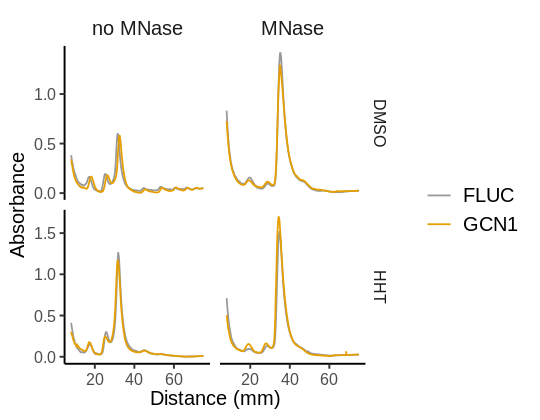

In [82]:
options(repr.plot.width=4.5, repr.plot.height=3.5)

counts %>%
  filter(Position > 8 & Position < 75) %>% 
  rename(`Distance (mm)` = Position) %>%
  mutate(nuclease = fct_relevel(nuclease, "MNase", after = Inf)) %>%
  ggplot(aes(x = `Distance (mm)`, y = Absorbance, color = sgRNA)) +
  facet_grid(Treatment~nuclease, scale = "free") +
  geom_line() +
  scale_color_manual(values = cbPalette) +
  theme(legend.title=element_blank()) +
  NULL

ggsave("../figures/polysome_profiles_mnase.pdf", width = 5, height = 3.5)